treecorr_build_catalog.ipynb

Separates the KiDS SOM gold catalog into individual bins.
Also in this notebook: first-pass attempt to calculate excess surface density signal. Later carried this over into treecorr_delta_sigma.py

In [175]:
import os
from fnmatch import fnmatch

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import fitsio

from astropy.io import fits, ascii
from astropy.table import Table
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0 = 70, Om0 = 0.3, Ode0 = 0.7)

plt.rcParams.update({
    'font.family'      :'serif',
    'font.size'        : 24,
    'font.serif'       :'Georgia',
    'axes.labelsize'   :'large',
    'mathtext.fontset' :'stix',
    'axes.linewidth'   :  1.5,
    'xtick.direction'  :'in',
    'ytick.direction'  :'in',
    'xtick.major.size' : 5,
    'ytick.major.size' : 5,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
})

import treecorr

KiDS-1000 tomographic binning: <br>
| Bin |    $z_{\rm B}$ range     |       $m$        |
|-----|:------------------------:|:----------------:|
|  1  |$0.1 < z_{\rm B} \leq 0.3$|$-0.009 \pm 0.019$|
|  2  |$0.3 < z_{\rm B} \leq 0.5$|$-0.011 \pm 0.020$|
|  3  |$0.5 < z_{\rm B} \leq 0.7$|$-0.015 \pm 0.017$|
|  4  |$0.7 < z_{\rm B} \leq 0.9$|$ 0.002 \pm 0.012$|
|  5  |$0.9 < z_{\rm B} \leq 1.2$|$ 0.007 \pm 0.010$|

Drawn from Giblin et al. (2020)


In [2]:
# bin1_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin1.fits', ext = 1)
# bin1_data = Table(bin1_data)

# bin2_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin2.fits', ext = 1)
# bin2_data = Table(bin2_data)

bin3_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin3.fits', ext = 1)
bin3_data = Table(bin3_data)

# bin4_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin4.fits', ext = 1)
# bin4_data = Table(bin4_data)

# bin5_data = fitsio.read('/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin5.fits', ext = 1)
# bin5_data = Table(bin5_data)

In [3]:
# src_n_z_bin1 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO1_Nz.asc')
# src_n_z_bin2 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO2_Nz.asc') 
src_n_z_bin3 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO3_Nz.asc') 
# src_n_z_bin4 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO4_Nz.asc') 
# src_n_z_bin5 = ascii.read('/data2/lsajkov/mpdg/data/KiDS/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_SOMcols_Fid_blindC_TOMO5_Nz.asc') 

In [4]:
# src_n_z_mean_bin1 = np.dot(src_n_z_bin1['col1'], src_n_z_bin1['col2'])
# src_n_z_mean_bin2 = np.dot(src_n_z_bin2['col1'], src_n_z_bin2['col2'])
src_n_z_mean_bin3 = np.dot(src_n_z_bin3['col1'], src_n_z_bin3['col2'])
# src_n_z_mean_bin4 = np.dot(src_n_z_bin4['col1'], src_n_z_bin4['col2'])
# src_n_z_mean_bin5 = np.dot(src_n_z_bin5['col1'], src_n_z_bin5['col2'])

In [141]:
lens_n_z_md = ascii.read('/data2/lsajkov/mpdg/data_products/KiDS/WL/n_z/mstar_md_n_z')

In [6]:
lens_n_z_md_mean = np.dot(lens_n_z_md['col0'], lens_n_z_md['col1'])

In [7]:
def degree_to_hMpc(degree, redshift):
    radian = (degree * u.degree).to(u.radian)
    comoving_dist_Mpc = cosmo.comoving_distance(redshift).value
    hMpc = comoving_dist_Mpc * np.tan(radian)
    return hMpc

def hMpc_to_degree(hMpc, redshift):
    comoving_dist_Mpc = cosmo.comoving_distance(redshift).value
    radian = np.arctan(hMpc/comoving_dist_Mpc)
    degree = (radian * u.radian).to(u.degree)
    return degree.value

Attempt to measure signal in tomographic bin 3, higher mass dwarfs

In [73]:
source_catalog   = '/data2/lsajkov/mpdg/data/KiDS/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat/KiDS_DR4.1_WL_bin3.fits'

src_ra      = fitsio.read(source_catalog, columns = ['RAJ2000'], ext = 1)
src_ra      = np.array([ra[0] for ra in src_ra])

src_dec     = fitsio.read(source_catalog, columns = ['DECJ2000'], ext = 1)
src_dec     = np.array([dec[0] for dec in src_dec])

src_g1      = fitsio.read(source_catalog, columns = ['e1'], ext = 1)
src_g1      = np.array([g1[0] for g1 in src_g1])

src_g2      = fitsio.read(source_catalog, columns = ['e2'], ext = 1) 
src_g2      = np.array([g2[0] for g2 in src_g2])

src_weights = fitsio.read(source_catalog, columns = ['weight'], ext = 1)
src_weights = np.array([weight[0] for weight in src_weights])

sources_bin3 = treecorr.Catalog(ra = src_ra, dec = src_dec,
                                ra_units = 'degree', dec_units = 'degree',
                                g1 = src_g1, g2 = src_g2,
                                w = src_weights)

# sources_bin3 = treecorr.Catalog(ra = bin3_data['RAJ2000'], dec = bin3_data['DECJ2000'],
#                                 g1 = bin3_data['e1'], g2 = bin3_data['e2'],
#                                 w = bin3_data['weight'],
#                                 ra_units = 'degrees', dec_units = 'degrees')

In [74]:
lens_catalog   = '/data2/lsajkov/mpdg/data_products/predicted_catalogs/KiDS_mstar_md_bin_31Jul24.fits'
lens_ra        = fitsio.read(lens_catalog, columns = ['ra'])
lens_ra_rad    = (lens_ra * u.deg).to(u.rad).value
lens_dec       = fitsio.read(lens_catalog, columns = ['dec'])
lens_dec_rad   = (lens_dec * u.deg).to(u.rad).value
lens_redshifts = fitsio.read(lens_catalog, columns = ['redshift_pred'])

lens_distances = cosmo.comoving_distance([z[0] for z in lens_redshifts])

In [80]:
lens_cat = treecorr.Catalog(ra = lens_ra, dec = lens_dec, 
                            ra_units = 'degrees', dec_units = 'degrees')

In [97]:
log10_hMpc_bin_lo = -2
log10_hMpc_bin_hi = 1
bins = 20
hMpc_bins = np.logspace(log10_hMpc_bin_lo, log10_hMpc_bin_hi, bins)

degree_bins = hMpc_to_degree(hMpc_bins, lens_n_z_md_mean)

In [98]:
config = {'nbins':   bins,
          'min_sep': degree_bins[0],
          'max_sep': degree_bins[-1],
          'sep_units': 'degree'}

In [99]:
ngc = treecorr.NGCorrelation(config = config)

In [102]:
ngc.process(lens_cat, sources_bin3)

In [207]:
#average critical surface density
G_in_pc_msun_s = const.G.to(u.parsec**3/(u.Msun * u.s**2))
c_in_pc_s      = const.c.to(u.parsec/u.s)

scaling = 4 * np.pi * G_in_pc_msun_s / (c_in_pc_s**2)

#lens integral
lens_redshifts     = lens_n_z_md['col0']
lens_dz            = lens_redshifts[1] - lens_redshifts[0] #the redshift bins are linear, all deltas are the same
lens_ang_diam_dist = cosmo.angular_diameter_distance(lens_redshifts).to(u.parsec) 
lens_n_z           = lens_n_z_md['col1']
lens_n_z          /= np.sum(lens_n_z * lens_dz)

lens_integral = np.sum(lens_n_z * (1 + lens_redshifts) ** 2 * lens_ang_diam_dist * lens_dz)

#source integral
beyond_lens_idx          = src_n_z_bin3['col1'] > lens_n_z_md_mean
src_redshifts            = src_n_z_bin3[beyond_lens_idx]['col1']
src_dz                   = src_redshifts[1] - src_redshifts[0] #the redshift bins are linear, all deltas are the same
src_n_z                  = src_n_z_bin3[beyond_lens_idx]['col2']/(np.dot(src_n_z_bin3['col1'], src_n_z_bin3['col2']))
src_n_z                 /= np.sum(src_n_z * src_dz)
src_ang_diam_dist        = cosmo.angular_diameter_distance(src_redshifts).to(u.parsec)
src_ang_diam_dist_w_lens = cosmo.angular_diameter_distance_z1z2(lens_n_z_md_mean, src_redshifts).to(u.parsec)

src_integral = np.sum(src_n_z * src_ang_diam_dist_w_lens / src_ang_diam_dist * src_dz)

#total integral
avg_sigma_crit = scaling * lens_integral * src_integral 

Text(0.35, 0.85, 'Source bin: $0.5 < z \\leq 0.7$')

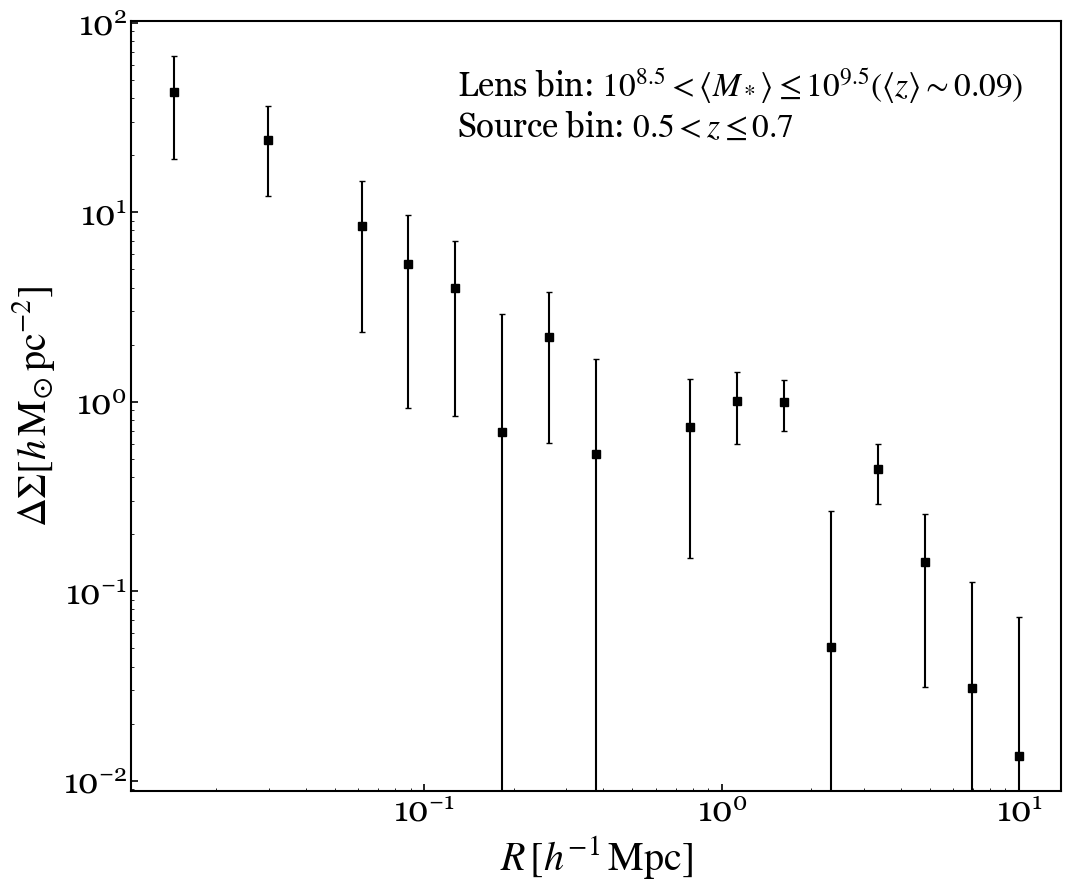

In [213]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

m_in_bin = -0.015

ax.errorbar(hMpc_bins[ngc.xi > 0], ngc.xi[ngc.xi > 0]/avg_sigma_crit.value/(1 + m_in_bin),
            yerr = np.sqrt(ngc.varxi[ngc.xi > 0])/avg_sigma_crit.value/(1 + m_in_bin),
            color = 'none', ecolor = 'black', capsize = 2,
            marker = 's', markersize = 6, markerfacecolor = 'black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$R\, [h^{-1} {\rm\, Mpc}]$')
ax.set_ylabel(r'$\Delta \Sigma [h\,{\rm M}_{\odot}\,{\rm pc}^{-2}]$')

ax.text(0.35, 0.9, r'Lens bin: $10^{8.5} < \langle M_* \rangle \leq 10^{9.5} (\langle z \rangle \sim 0.09)$',
        transform = ax.transAxes)
ax.text(0.35, 0.85, r'Source bin: $0.5 < z \leq 0.7$',
        transform = ax.transAxes)

In [245]:
plot_values = np.array([hMpc_bins[ngc.xi > 0], ngc.xi[ngc.xi > 0]/avg_sigma_crit.value/(1 + m_in_bin), np.sqrt(ngc.varxi[ngc.xi > 0])/avg_sigma_crit.value/(1 + m_in_bin)]).transpose()
ascii.write(plot_values, '/data2/lsajkov/mpdg/figures/delta_sigma/delta_sigma_lens_md_src_3_01Aug24.dat')